In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_samples=100,n_features=2,centers = 2,random_state=2)

In [3]:
X.shape

(100, 2)

In [4]:
Y.shape

(100,)

In [5]:
X[:5]

array([[ 0.18757605, -9.8171527 ],
       [-3.93955141, -9.57292799],
       [-0.72864791, -7.18926735],
       [ 0.27399572, -1.87696674],
       [ 1.35238289, -0.67133173]])

In [6]:
Y[:5]

array([0, 0, 0, 1, 1])

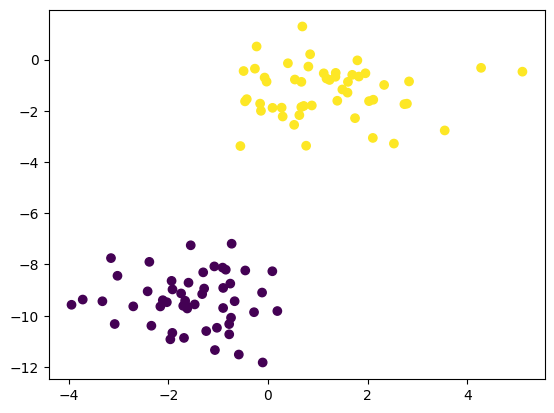

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
X_train.shape,Y_train.shape

((80, 2), (80,))

In [11]:
X_test.shape,Y_test.shape

((20, 2), (20,))

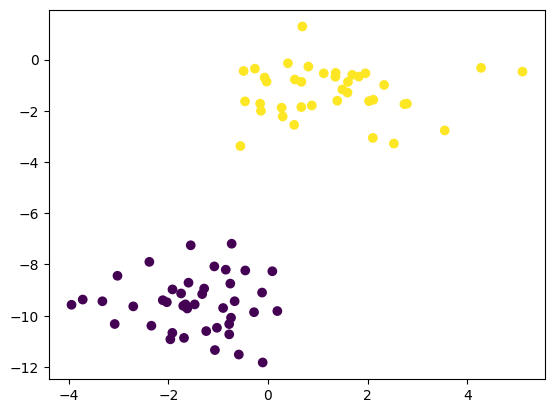

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train)
plt.show()

In [13]:
def distance(p1,p2):
    return np.sum((p2-p1)**2)**0.5

In [14]:
distance(np.array([1,1]),np.array([4,2]))

3.1622776601683795

In [15]:
from scipy import stats

In [16]:
def KNN(X_train,Y_train,x_query,k = 5):
    distances = []
    for i in range(len(X_train)):
        d = distance(X_train[i],x_query)
        distances.append((d,Y_train[i]))
    distances = sorted(distances)
    nearest_distances = distances[:k]
    nearest_distances = np.array(nearest_distances)
    labels  = nearest_distances[:,-1]
    majority = stats.mode(labels)
    return majority[0]

In [17]:
KNN(X_train,Y_train,X_test[-2])

1.0

In [18]:
KNN(X_train,Y_train,X_test[10])

1.0

In [19]:
X_test[10]

array([ 1.23468919, -0.7961265 ])

In [20]:
X_test

array([[ 0.71707007, -1.81043604],
       [ 0.765002  , -3.36316441],
       [ 1.79242955, -0.03093848],
       [-1.66161844, -9.41498635],
       [-0.42556099, -1.54532627],
       [-0.90965742, -8.1218415 ],
       [ 1.74521441, -2.28731313],
       [-2.41323523, -9.04838281],
       [-0.22817961,  0.51092449],
       [-1.93335222, -8.63901908],
       [ 1.23468919, -0.7961265 ],
       [ 1.17365936, -0.74038787],
       [-1.29923245, -8.30647414],
       [ 2.82858228, -0.85286228],
       [ 0.62877047, -2.16953163],
       [-3.14819261, -7.7502907 ],
       [-0.89823572, -8.91519992],
       [ 0.09100349, -1.88452442],
       [ 0.84510237,  0.20788477],
       [-2.15820985, -9.63790953]])

In [21]:
Y_pred = []
for xq in X_test:
    p = KNN(X_train,Y_train,xq)
    Y_pred.append(p)

In [22]:
Y_pred

[1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0]

In [23]:
Y_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier(n_neighbors=5)

In [26]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [27]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [28]:
Y_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [29]:
model.score(X_test,Y_test)

1.0

### Digit Classification

In [30]:
from sklearn.datasets import load_digits

In [31]:
digits = load_digits()

In [32]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [33]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [34]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
digits['images'].shape

(1797, 8, 8)

In [36]:
digits['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [37]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
digits.data.shape

(1797, 64)

In [39]:
plt.gray()

<Figure size 640x480 with 0 Axes>

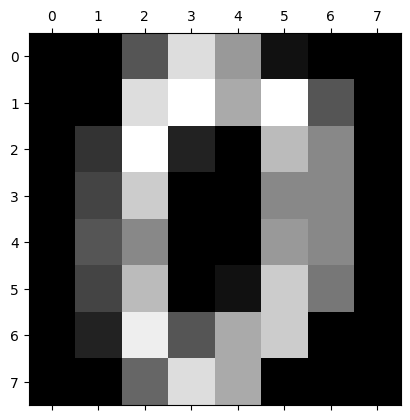

In [40]:
plt.matshow(digits.images[0])
plt.show()

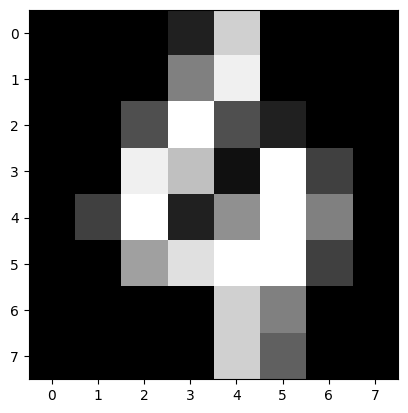

In [41]:
plt.imshow(digits['images'][100])
plt.show()

In [42]:
digits['target'][100]

4

In [43]:
load_digits?

Signature: load_digits(*, n_class=10, return_X_y=False, as_frame=False)
Docstring:
Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

=================   ==============
Classes                         10
Samples per class             ~180
Samples total                 1797
Dimensionality                  64
Features             integers 0-16
=================   ==============

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Read more in the :ref:`User Guide <digits_dataset>`.

Parameters
----------
n_class : int, default=10
    The number of classes to return. Between 0 and 10.

return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a

In [44]:
digits.data.shape

(1797, 64)

In [45]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [46]:
x = digits.data

In [47]:
y = digits['target']

In [48]:
x.shape

(1797, 64)

In [49]:
y.shape

(1797,)

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
digits['images'].flatten().shape

(115008,)

In [52]:
X_train.shape,Y_train.shape

((1437, 64), (1437,))

In [53]:
X_test.shape,Y_test.shape

((360, 64), (360,))

In [54]:
model = KNeighborsClassifier(n_neighbors=5)

In [55]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [56]:
model.predict(X_test)

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [57]:
model.predict(X_test[13])

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0.  5. 12.  9.  1.  0.  0.  0.  0. 14. 14. 13. 13.  0.  0.  0.  3.
 12.  1.  1. 13.  4.  0.  0.  7.  8.  0.  0.  6.  8.  0.  0.  8.  8.  0.
  0.  5.  8.  0.  0.  5. 10.  0.  0. 11.  4.  0.  0.  1. 15.  9. 11. 13.
  0.  0.  0.  0.  7. 15. 12.  2.  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
model.predict(X_test[13].reshape(1,64))

array([0])

In [59]:
X_test[13]

array([ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 14., 14., 13.,
       13.,  0.,  0.,  0.,  3., 12.,  1.,  1., 13.,  4.,  0.,  0.,  7.,
        8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,
        0.,  0.,  5., 10.,  0.,  0., 11.,  4.,  0.,  0.,  1., 15.,  9.,
       11., 13.,  0.,  0.,  0.,  0.,  7., 15., 12.,  2.,  0.,  0.])

In [60]:
X_test[13].reshape(8,8)

array([[ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 14., 14., 13., 13.,  0.,  0.],
       [ 0.,  3., 12.,  1.,  1., 13.,  4.,  0.],
       [ 0.,  7.,  8.,  0.,  0.,  6.,  8.,  0.],
       [ 0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.],
       [ 0.,  5., 10.,  0.,  0., 11.,  4.,  0.],
       [ 0.,  1., 15.,  9., 11., 13.,  0.,  0.],
       [ 0.,  0.,  7., 15., 12.,  2.,  0.,  0.]])

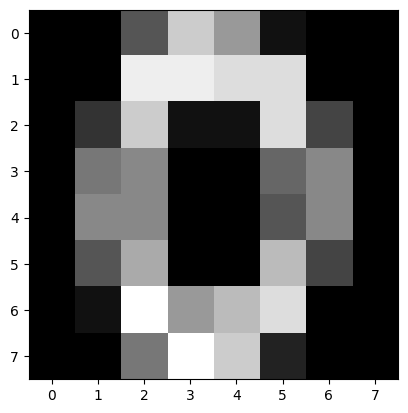

In [62]:
plt.imshow(X_test[13].reshape(8,8))

In [63]:
def predict_and_plot(idx):
    pred = model.predict(X_test[idx].reshape(1,64))
    print("Predicted :",pred)
    plt.imshow(X_test[idx].reshape(8,8),cmap = 'gray')

Predicted : [3]


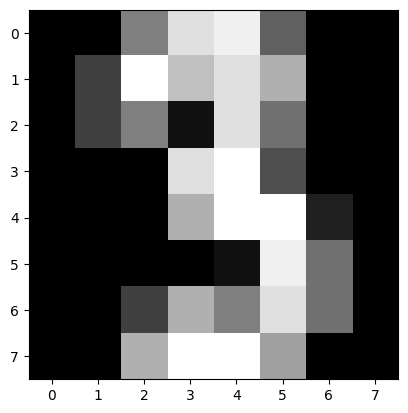

In [64]:
predict_and_plot(16)

In [65]:
Y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [66]:
model.score(X_test,Y_test)*100

98.61111111111111